# Описание набора данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns


В этом задании вам предлагается построить классификатор, обученный на изображениях лиц. Сначала загрузим необходимый набор данных и посмотрим, что он из себя представляет. 

Таблица содержит "распрямленные" представления изображений лиц людей.

Изначально каждое изображение — матрица размера $62 \times 47$, значения которой, предположительно, нормированы к диапазону $[0, 1]$ из диапазона $[0, 255] \cap \mathbb Z$. Сами значения отвечают за интенсивность пикселя: чем значение больше, тем пиксель светлее.

Обратите внимание, из картинки (или, что то же самое, матрицы) размера $62 \times 47$ получился вектор длины $2914 = 62 \cdot 47$.

Колонка <code>label</code> отвечает за имя человека, изображенного на картинке.

In [243]:
df = pd.read_csv('persons_pics_train.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,label
0,0.379085,0.312418,0.352941,0.445752,0.466667,0.473203,0.484967,0.513725,0.545098,0.571242,...,0.597386,0.620915,0.732026,0.852288,0.921569,0.937255,0.941176,0.950327,0.946405,John Ashcroft
1,0.450980,0.466667,0.512418,0.509804,0.450980,0.458824,0.516340,0.571242,0.607843,0.618301,...,0.430065,0.453595,0.679739,0.934640,0.985621,0.981699,0.963399,0.938562,0.874510,Ariel Sharon
2,0.589542,0.614379,0.688889,0.729412,0.738562,0.775163,0.789543,0.806536,0.820915,0.837908,...,0.733333,0.854902,0.937255,0.624837,0.128105,0.082353,0.107190,0.095425,0.100654,Colin Powell
3,0.390850,0.432680,0.499346,0.562091,0.597386,0.644444,0.670588,0.650980,0.637908,0.639216,...,0.713726,0.898039,0.968627,0.959477,0.832680,0.443137,0.266667,0.303268,0.313725,Jean Chretien
4,0.645752,0.626144,0.605229,0.585621,0.602614,0.664052,0.701961,0.709804,0.733333,0.771242,...,0.115033,0.129412,0.132026,0.129412,0.155556,0.171242,0.167320,0.176471,0.183007,Colin Powell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,0.237908,0.273203,0.244444,0.332026,0.590850,0.675817,0.684967,0.733333,0.771242,0.771242,...,0.686275,0.694118,0.720261,0.746405,0.756863,0.735948,0.715033,0.684967,0.657516,Tony Blair
1322,0.105882,0.087582,0.117647,0.260131,0.385621,0.466667,0.566013,0.657516,0.692810,0.691503,...,0.722876,0.376471,0.188235,0.139869,0.188235,0.226144,0.243137,0.248366,0.244444,Gerhard Schroeder
1323,0.322876,0.345098,0.369935,0.375163,0.405229,0.464052,0.494118,0.511111,0.517647,0.495425,...,0.465359,0.486274,0.505882,0.535948,0.550327,0.551634,0.552941,0.554248,0.563399,George W Bush
1324,0.304575,0.290196,0.366013,0.444444,0.456209,0.465359,0.479739,0.532026,0.585621,0.603922,...,0.513725,0.802614,0.942484,0.933333,0.707190,0.223529,0.124183,0.133333,0.113725,George W Bush


Убедимся в том, что перед нами действительно изображения лиц людей. Возьмем первые $15$ строк из таблицы исходных данных и построим соответствующие им изображения.

In [104]:
import matplotlib.pyplot as plt

def get_img_by_row(row):
    return row.drop('label').astype(float).to_numpy().reshape(62,47), row['label']

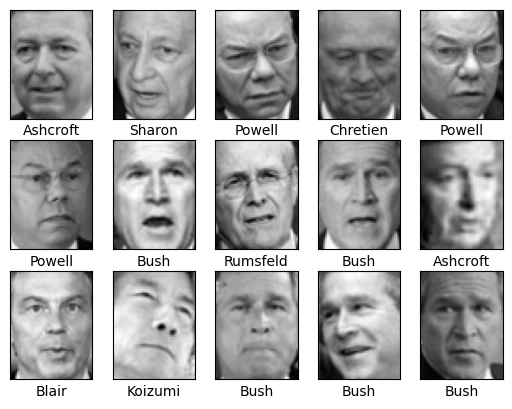

In [105]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])
#plt.savefig('persons_pics_img_for_description.png', dpi = 300, bbox_inches='tight')    

Крупнее

(-0.5, 46.5, 61.5, -0.5)

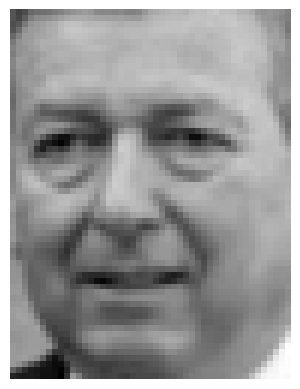

In [106]:
plt.imshow(df.iloc[0].drop('label').astype(float).to_numpy().reshape(62,47), cmap='gray')
plt.axis('off')

# Немного озорства

Определите число различных людей, фотографии которых содержатся в рассматриваемом наборе данных.

In [107]:
len(df['label'].unique())

12

Постройте гистограмму распределения объектов по классам и вычислите долю объектов каждого класса. 

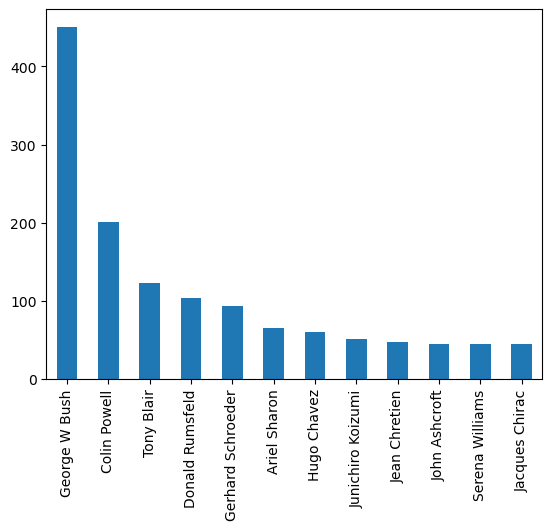

George W Bush        0.340121
Colin Powell         0.151584
Tony Blair           0.092006
Donald Rumsfeld      0.077677
Gerhard Schroeder    0.070136
Ariel Sharon         0.049020
Hugo Chavez          0.045249
Junichiro Koizumi    0.038462
Jean Chretien        0.035445
John Ashcroft        0.033937
Serena Williams      0.033183
Jacques Chirac       0.033183
Name: label, dtype: float64


In [108]:
df['label'].value_counts().plot(kind='bar')
plt.show()

class_counts = df['label'].value_counts()
class_percentages = class_counts / class_counts.sum()
print(class_percentages)


На основе имеющихся данных поставьте в соответствие каждому человеку один вектор, координаты которого являются средним соответствующих координат всех векторов, отождествленных с этим человеком.

In [109]:
mean_vectors = df.groupby('label').mean()
average_vectors = {}
for label, vector in mean_vectors.iterrows():
    average_vectors[label] = vector.values

In [110]:
mean_vectors

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
label,,,,,,,,,,,,,,,,,,,,,
Ariel Sharon,0.501398,0.514811,0.532609,0.551714,0.569754,0.577456,0.581820,0.591835,0.604465,0.612589,...,0.396400,0.433947,0.478291,0.519920,0.532549,0.515656,0.498220,0.486657,0.466928,0.437687
Colin Powell,0.433512,0.441147,0.456248,0.471947,0.486730,0.513732,0.545157,0.566514,0.581556,0.592924,...,0.437869,0.471798,0.512067,0.534615,0.532176,0.510006,0.477586,0.448119,0.410659,0.379605
Donald Rumsfeld,0.404810,0.417260,0.442731,0.474028,0.507938,0.541659,0.560112,0.571838,0.585773,0.602386,...,0.494917,0.546837,0.562307,0.558627,0.549426,0.525947,0.500603,0.475550,0.431893,0.391738
George W Bush,0.348179,0.360263,0.381659,0.416669,0.457154,0.488335,0.515398,0.536075,0.551153,0.565662,...,0.385818,0.414092,0.441074,0.461325,0.470275,0.459067,0.447653,0.430523,0.399620,0.376584
Gerhard Schroeder,0.210162,0.228210,0.268255,0.328344,0.389332,0.447115,0.495003,0.527655,0.549441,0.569457,...,0.414969,0.430937,0.469281,0.494596,0.496718,0.482550,0.442252,0.428477,0.426875,0.411118
Hugo Chavez,0.206885,0.205142,0.240828,0.300806,0.370196,0.427712,0.471939,0.512702,0.545251,0.562070,...,0.337647,0.360523,0.372200,0.385926,0.394662,0.392309,0.384989,0.371503,0.372440,0.374052
Jacques Chirac,0.348010,0.368152,0.405704,0.436988,0.462686,0.498693,0.531135,0.553060,0.574629,0.594029,...,0.453832,0.469935,0.480957,0.486067,0.510933,0.537998,0.542751,0.505853,0.456625,0.434997
Jean Chretien,0.388958,0.412488,0.446614,0.487637,0.526158,0.563315,0.594827,0.628981,0.665026,0.685774,...,0.526380,0.574190,0.583452,0.555667,0.499764,0.455180,0.426060,0.415353,0.414713,0.397608
John Ashcroft,0.337894,0.334379,0.337662,0.357037,0.384779,0.397182,0.412375,0.431924,0.449441,0.466986,...,0.472651,0.468468,0.475759,0.489092,0.512999,0.540944,0.534524,0.524415,0.527495,0.527495


In [111]:
average_vectors = pd.DataFrame(average_vectors)

In [112]:
average_vectors

,Ariel Sharon,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Hugo Chavez,Jacques Chirac,Jean Chretien,John Ashcroft,Junichiro Koizumi,Serena Williams,Tony Blair
0,0.501398,0.433512,0.404810,0.348179,0.210162,0.206885,0.348010,0.388958,0.337894,0.268384,0.412983,0.327922
1,0.514811,0.441147,0.417260,0.360263,0.228210,0.205142,0.368152,0.412488,0.334379,0.253672,0.390434,0.342955
2,0.532609,0.456248,0.442731,0.381659,0.268255,0.240828,0.405704,0.446614,0.337662,0.249699,0.359091,0.363163
3,0.551714,0.471947,0.474028,0.416669,0.328344,0.300806,0.436988,0.487637,0.357037,0.257875,0.333541,0.401854
4,0.569754,0.486730,0.507938,0.457154,0.389332,0.370196,0.462686,0.526158,0.384779,0.297373,0.337136,0.456177
...,...,...,...,...,...,...,...,...,...,...,...,...
2909,0.515656,0.510006,0.525947,0.459067,0.482550,0.392309,0.537998,0.455180,0.540944,0.537896,0.308200,0.552277
2910,0.498220,0.477586,0.500603,0.447653,0.442252,0.384989,0.542751,0.426060,0.534524,0.532359,0.322460,0.542077
2911,0.486657,0.448119,0.475550,0.430523,0.428477,0.371503,0.505853,0.415353,0.524415,0.516750,0.334492,0.516072
2912,0.466928,0.410659,0.431893,0.399620,0.426875,0.372440,0.456625,0.414713,0.527495,0.498347,0.348247,0.480853


Вычислите координату с индексом $0$ усредненного вектора, соответствующего человеку из вашего индивидуального задания.

In [113]:
average_vectors['Gerhard Schroeder'][0]


0.21016234977419354

Используя усредненные векторы, постройте изображения всех людей из набора данных.

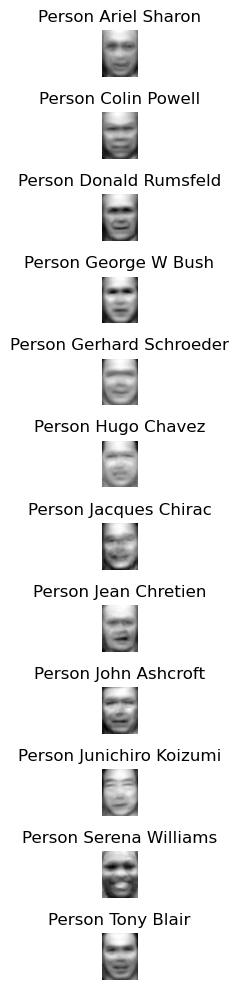

In [116]:

fig, axes = plt.subplots(nrows=len(average_vectors.columns), ncols=1, figsize=(10, 10))

# Перебираем каждый столбец DataFrame и строим соответствующее изображение
for i, column in enumerate(average_vectors.columns):
    ax = axes[i]
    img = average_vectors[column].values.reshape(62, 47)  # Переформатирование вектора в изображение
    ax.imshow(img, cmap='gray')  # Отображение изображения в оттенках серого
    ax.set_title(f'Person {column}')  # Установка заголовка для каждого изображения
    ax.axis('off')  # Отключение осей

plt.tight_layout()
plt.show()


В качестве меры "схожести" двух объектов часто используют так называемое [косинусное сходство](https://en.wikipedia.org/wiki/Cosine_similarity). Не следует путать с косинусным расстоянием.

Постройте матрицу "схожести" объектов на основе их усредненных векторов. Для визуализации рекомендуем использовать тепловую карту, например, [из библиотеки seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

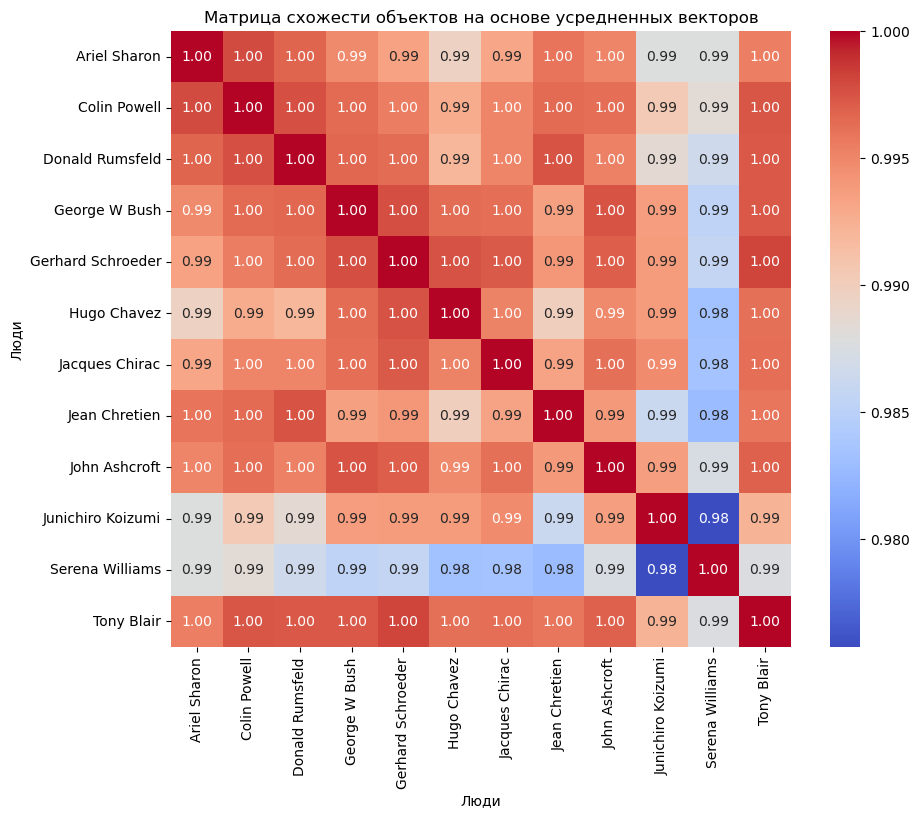

In [117]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Вычисление матрицы косинусного сходства
similarity_matrix = cosine_similarity(average_vectors.T)

# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=average_vectors.columns, yticklabels=average_vectors.columns)
plt.title('Матрица схожести объектов на основе усредненных векторов')
plt.xlabel('Люди')
plt.ylabel('Люди')
plt.show()


Определите косинусное сходство для пары людей из вашего индивидуального задания на основе соответствующих им "усредненных" векторов.

In [118]:
import numpy as np

# Векторы A и B
A = average_vectors['Donald Rumsfeld']
B = average_vectors['Serena Williams']

# Вычисление косинусного сходства
dot_product = np.dot(A, B)
norm_A = np.linalg.norm(A)
norm_B = np.linalg.norm(B)

similarity = dot_product / (norm_A * norm_B)
print("Косинусное сходство между векторами A и B:", similarity)


Косинусное сходство между векторами A и B: 0.9866056618941133


# Построение модели

При помощи <code>train_test_split()</code> разделите набор данных на тренировочный и тестовый с параметрами, указанными в вашем индивидуальном задании. Используйте стратификацию по колонке <code>label</code>.

In [225]:
train, test = train_test_split(df, test_size=0.2, random_state=5, stratify=df['label'])

In [244]:
train.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

## Первое приближение: базовый SVM классификатор с линейным ядром.

Обучите модель <code>SVC()</code> на тренировочном наборе данных с параметрами, указанными в вашем индивидуальном задании.

In [226]:
model = SVC(kernel='linear', random_state=5)

Оцените модель на тестовых данных. Вычислите <code>f1_score(average='weighted')</code>

In [227]:
model.fit(train.drop(['label'], axis = 1), train['label'])
f1_score(test['label'], model.predict(test.drop(['label'], axis = 1)), average='weighted')

0.7408103886614767

В целом, достаточно неплохой результат, но имеет смысл попробовать подобрать параметры.

## Подбор гиперпараметров

Используя <code>GridSearchCV()</code>, осуществите подбор гиперпараметров, указанных в вашем задании. Отдельно обратите внимание на время обучения моделей

In [228]:
tuned_parameters = [{'kernel': ['sigmoid'], 'gamma': [1e-4],
                     'C': [1000], 'class_weight': ['balanced'], 'random_state':[5]}]


cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)

Определите гиперпараметры лучшей полученной модели.

In [229]:
cv.fit(train.drop(['label'], axis = 1), train['label'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.774 total time=   2.1s
[CV 2/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.774 total time=   1.9s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.825 total time=   1.9s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.802 total time=   1.7s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.783 total time=   1.9s


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1000], 'class_weight': ['balanced'],
                          'gamma': [0.0001], 'kernel': ['sigmoid'],
                          'random_state': [5]}],
             verbose=3)

In [ ]:
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear, random_state=5;, score=0.825 total time=   0.8s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.825 total time=   0.9s

In [140]:
cv.best_params_

{'C': 1000,
 'class_weight': 'balanced',
 'gamma': 0.0001,
 'kernel': 'sigmoid',
 'random_state': 5}

Выполните предсказание для тестовых данных при помощи лучшей полученной модели. Вычислите <code>f1_score(average='weighted')</code>.

In [230]:
f1_score(test['label'], cv.predict(test.drop(['label'], axis = 1)), average='weighted')

0.770802678845364

## Уменьшение размерности

Обучение было долгим. Имеет смысл проверить, что будет если уменьшить размерность входных данных, например, при помощи <code>PCA</code>. Обучите модель <code>PCA(svd_solver='full')</code> на тренировочных данных и определите минимальное количество компонент, необходимое для того, чтобы уровень объясненной дисперсии был больше <code>0.95</code>.

In [245]:
pca = PCA(svd_solver='full', n_components=173)
pca.fit(train.drop(['label'], axis = 1))
pca.explained_variance_ratio_.sum()

0.9501381883625236

Заново обучите модель <code>PCA(svd_solver='full')</code> на тренировочных данных с использованием полученного числа ГК. Примените полученное преобразование для тренировочных и тестовых данных.

In [261]:
df2 = df.copy()

In [246]:

# Преобразование данных PCA
df2[''] = pca.transform(train.drop(['label'], axis=1))
test_transformed = pca.transform(test.drop(['label'], axis=1))



In [247]:
train_1 = pd.DataFrame(train_1)
test_1 = pd.DataFrame(test_1)

In [265]:
train_data_transformed = pca.transform(train.drop(['label'], axis=1))
test_data_transformed = pca.transform(test.drop(['label'], axis=1))

In [266]:
test_data_transformed

array([[ 2.61438361e+00,  1.88530889e+00,  1.31693645e+00, ...,
         4.17520720e-02,  2.10801869e-02,  1.37541804e-01],
       [ 1.27476403e+01,  2.45029400e-01, -1.67995829e+00, ...,
         7.98258319e-01, -1.77522515e-01, -5.69988851e-01],
       [-9.88986917e-03,  9.52345179e-01,  9.45055930e-01, ...,
        -2.98537889e-02,  1.06521336e-01,  3.64021362e-01],
       ...,
       [ 6.53382947e-01,  1.32124201e+00,  2.88089454e+00, ...,
         2.37712517e-01,  1.82108916e-02, -4.77376572e-02],
       [-1.26307489e+00,  1.09364754e+00, -9.60999425e-01, ...,
         9.04446335e-03, -2.71186447e-01, -1.54355825e-01],
       [-3.68193116e-01,  2.14735144e+00, -3.27777480e-01, ...,
        -9.40657234e-02,  2.66891130e-01, -2.00618414e-01]])

In [255]:
train_1.to_excel('train1.xlsx')
test_1.to_excel('test1.xlsx')

In [258]:
train1 = pd.read_excel('train1.xlsx')
test1 = pd.read_excel('test1.xlsx')

In [259]:
train1

,transformed,label
0,0.083801,John Ashcroft
1,0.576494,Ariel Sharon
2,-4.699990,Colin Powell
3,-5.824352,Jean Chretien
4,-2.202157,Colin Powell
...,...,...
1055,5.046093,Gerhard Schroeder
1056,11.558942,Colin Powell
1057,-5.958090,Jean Chretien
1058,2.648755,Junichiro Koizumi


Для полученных после <code>PCA</code> данных аналогично проделанному ранее, то есть используя <code>GridSearchCV()</code>, осуществите подбор гиперпараметров, указанных в вашем задании. Отдельно обратите внимание на время обучения моделей.

In [267]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[5]}]


cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit((train_data_transformed), train['label'])

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.745 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.750 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.811 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.764 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.745 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.344 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.340 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=5;, score=0.340 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gam

[CV 4/5] END C=1, class_weight=balanced, gamma=0.0001, kernel=rbf, random_state=5;, score=0.061 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, gamma=0.0001, kernel=rbf, random_state=5;, score=0.061 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.349 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.071 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.165 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.052 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, gamma=0.0001, kernel=sigmoid, random_state=5;, score=0.047 total time=   0.1s
[CV 1/5] END C=10, class_weight=None, gamma=0.001, kernel=linear, random_state=5;, score=0.745 total time=   0.0s
[CV 2/5] END C=10, class_weight=None, gamma=0.001, kernel=lin

[CV 1/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=poly, random_state=5;, score=0.033 total time=   0.0s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=poly, random_state=5;, score=0.033 total time=   0.0s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=poly, random_state=5;, score=0.156 total time=   0.0s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=poly, random_state=5;, score=0.033 total time=   0.1s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=poly, random_state=5;, score=0.071 total time=   0.0s
[CV 1/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, random_state=5;, score=0.325 total time=   0.2s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, random_state=5;, score=0.382 total time=   0.2s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, random_state=5;, score=0.368 total time=   0.2s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf,

[CV 2/5] END C=100, class_weight=balanced, gamma=0.001, kernel=sigmoid, random_state=5;, score=0.774 total time=   0.1s
[CV 3/5] END C=100, class_weight=balanced, gamma=0.001, kernel=sigmoid, random_state=5;, score=0.807 total time=   0.1s
[CV 4/5] END C=100, class_weight=balanced, gamma=0.001, kernel=sigmoid, random_state=5;, score=0.788 total time=   0.1s
[CV 5/5] END C=100, class_weight=balanced, gamma=0.001, kernel=sigmoid, random_state=5;, score=0.783 total time=   0.1s
[CV 1/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=linear, random_state=5;, score=0.745 total time=   0.1s
[CV 2/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=linear, random_state=5;, score=0.750 total time=   0.0s
[CV 3/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=linear, random_state=5;, score=0.811 total time=   0.0s
[CV 4/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=linear, random_state=5;, score=0.764 total time=   0.0s
[CV 5/5] END C=100, class_weight=balance

[CV 2/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=poly, random_state=5;, score=0.396 total time=   0.1s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=poly, random_state=5;, score=0.420 total time=   0.2s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=poly, random_state=5;, score=0.429 total time=   0.2s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=poly, random_state=5;, score=0.434 total time=   0.2s
[CV 1/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=rbf, random_state=5;, score=0.764 total time=   0.1s
[CV 2/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=rbf, random_state=5;, score=0.741 total time=   0.3s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=rbf, random_state=5;, score=0.807 total time=   0.1s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=rbf, random_state=5;, score=0.783 total time=   0.1s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.001, ker

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'gamma': [0.001, 0.0001],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'random_state': [5]}],
             verbose=3)

Определите гиперпараметры лучшей полученной модели.

In [268]:
cv.best_params_

{'C': 1000,
 'class_weight': 'balanced',
 'gamma': 0.0001,
 'kernel': 'rbf',
 'random_state': 5}

Выполните предсказание для тестовых данных при помощи лучшей полученной модели. Вычислите <code>f1_score(average='weighted')</code>

In [269]:
f1_score(test['label'], cv.predict(test_data_transformed), average='weighted')

0.754762104839105

Видно, что качество модели изменилось незначительно, при этом время обучения существенно сократилось.